# Importing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_hunger_index=pd.read_csv('./input/the-global-hunger-index/global-hunger-index.csv')
df_underweight=pd.read_csv('./input/the-global-hunger-index/share-of-children-underweight.csv')
df_stunting=pd.read_csv('./input/the-global-hunger-index/share-of-children-younger-than-5-who-suffer-from-stunting.csv')
df_lowweight=pd.read_csv('./input/the-global-hunger-index/share-of-children-with-a-weight-too-low-for-their-height-wasting.csv')

In [ ]:
# Function for Describing data from file:
df_hunger_index.describe()

In [ ]:
# Function for getting shape of data :
df_hunger_index.shape


In [7]:
# Function for droping duplicates from dataset:
df_hunger_index = df_hunger_index.drop_duplicates() 
df_hunger_index.head()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [8]:
df_underweight.head()

,Entity,Code,Year,"Prevalence of underweight, weight for age (% of children under 5)"
0,Afghanistan,AFG,1997,44.900002
1,Afghanistan,AFG,2004,32.900002
2,Afghanistan,AFG,2013,24.600000
3,Afghanistan,AFG,2018,19.100000
4,Albania,ALB,1997,7.100000


In [9]:
df_stunting.head()

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)"
0,Afghanistan,AFG,1997,53.200001
1,Afghanistan,AFG,2004,59.299999
2,Afghanistan,AFG,2013,40.400002
3,Afghanistan,AFG,2018,38.200001
4,Albania,ALB,1997,20.400000


In [10]:
df_lowweight.head()

,Entity,Code,Year,"Prevalence of wasting, weight for height (% of children under 5)"
0,Afghanistan,AFG,1997,18.200001
1,Afghanistan,AFG,2004,8.600000
2,Afghanistan,AFG,2013,9.500000
3,Afghanistan,AFG,2018,5.100000
4,Albania,ALB,1997,8.100000


In [ ]:
def read_GHI_data():
    
    # Remove unnecessary columns
    df = df.drop(columns=['Code',  'Prevalence of wasting, weight for height (% of children under 5)'])

    # dataframe to have years as columns
    df_years = df.pivot(index='Entity', columns='Year')

    # dataframe to have Entities as columns
    df_countries = df.pivot(index='Year', columns='Entity')

    # Cleaning
    df_years = df_years.dropna()
    df_countries = df_countries.dropna()

    return df_years, df_countries

In [ ]:
# Create a dataframe  years as column:
df_years = df.pivot_table(index='Entity', columns='Year', aggfunc='count')
# Create a dataframe  countries as column:
df_countries = df.pivot_table(index='Year', columns='Entity', aggfunc='count')

In [11]:
df_hunger_index2=df_hunger_index.pivot(index='Entity', columns='Year', values='Global Hunger Index (2021)')
df_hunger_index2=df_hunger_index2.reset_index()
df_hunger_index2.head()

Year,Entity,2000,2006,2012,2021
0,Afghanistan,50.9,42.7,34.3,28.3
1,Albania,20.7,15.9,8.8,6.2
2,Algeria,14.5,11.7,8.9,6.9
3,Angola,65.0,46.9,27.8,26.0
4,Argentina,6.4,5.6,5.2,5.3


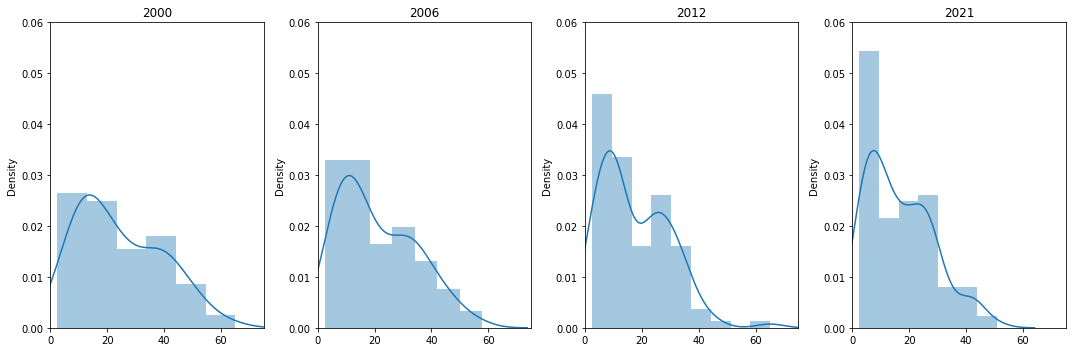

In [12]:
# Hunger Index Dstribution plot between 2000 to 2021**
col=[2000,2006,2012,2021]
fig = plt.figure(figsize=(15,5))

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    plt.title(col[i])
    sns.distplot(df_hunger_index2,x=df_hunger_index2[col[i]])
    plt.xlim([0,75])
    plt.ylim([0,0.06])
plt.tight_layout()
plt.show()

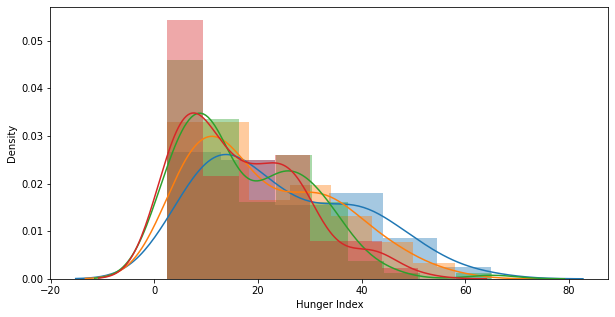

In [13]:
col=[2000,2006,2012,2021]
plt.figure(figsize=(10, 5))
for i in col:
    sns.distplot(df_hunger_index2[i],axlabel='Hunger Index')

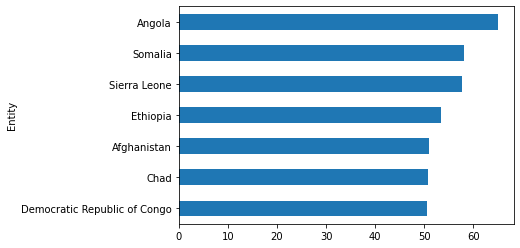

In [14]:
# Extremely Alarming (>=50) Hunger Index Countries in 2000
df_hunger_index2[df_hunger_index2[2000]>=50].sort_values(by=2000,
                                                            ascending=True).plot.barh(y=2000,x='Entity',legend=False);

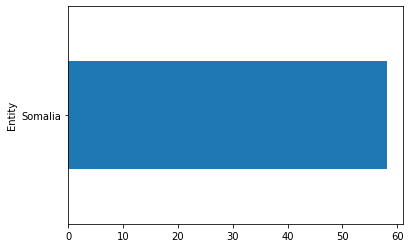

In [15]:
# Extremely Alarming (>=50) Hunger Index Countries in 2021
df_hunger_index2[df_hunger_index2[2021]>=50].sort_values(by=2000,
                                                            ascending=True).plot.barh(y=2000,x='Entity',legend=False);

Only Somalia is in Extremely Alarming (>=50) Hunger Index in 2021.

In [16]:
list=['Angola','Somalia','Sierra Leone','Ethiopia','Chad',"Democratic Republic of Congo"]

In [17]:
df_hunger_index_7=df_hunger_index[(df_hunger_index['Entity']=='Angola')|(df_hunger_index['Entity']=='Somalia')|(df_hunger_index['Entity']=='Sierra Leone')|
              (df_hunger_index['Entity']=='Ethiopia')|(df_hunger_index['Entity']=='Chad')|
               (df_hunger_index['Entity']=='Democratic Republic of Congo')]

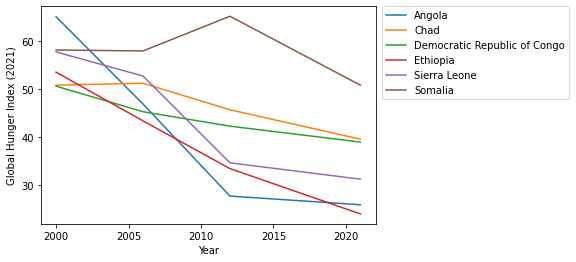

In [18]:
sns.lineplot(data=df_hunger_index_7, x="Year", y="Global Hunger Index (2021)", hue="Entity")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [19]:
# Prevalence of underweight, weight for age (% of children under 5) of 'Angola','Sierra Leone','Ethiopia','Chad',"Democratic Republic of Congo" and 'Somalia'
df_underweight_7=df_underweight[(df_underweight['Entity']=='Angola')|(df_underweight['Entity']=='Somalia')|(df_underweight['Entity']=='Sierra Leone')|
               (df_underweight['Entity']=='Ethiopia')|(df_underweight['Entity']=='Chad')|
               (df_underweight['Entity']=='Democratic Republic of Congo')]

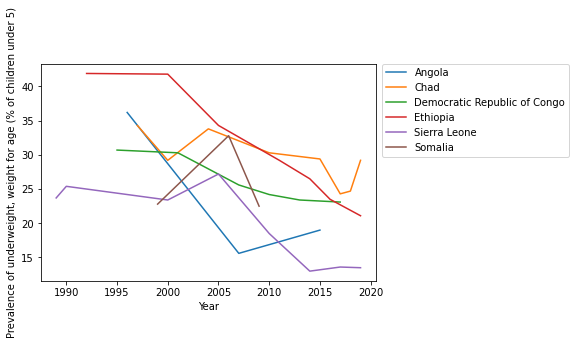

In [20]:
sns.lineplot(data=df_underweight_7, x="Year", y="Prevalence of underweight, weight for age (% of children under 5)", hue="Entity")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [21]:
# Prevalence of stunting, height for age (% of children under 5) of 'Angola','Sierra Leone','Ethiopia','Chad',"Democratic Republic of Congo" and 'Somalia
df_stunting_7=df_stunting[(df_stunting['Entity']=='Angola')|(df_stunting['Entity']=='Somalia')|(df_stunting['Entity']=='Sierra Leone')|
               (df_stunting['Entity']=='Ethiopia')|(df_stunting['Entity']=='Chad')|
               (df_stunting['Entity']=='Democratic Republic of Congo')]

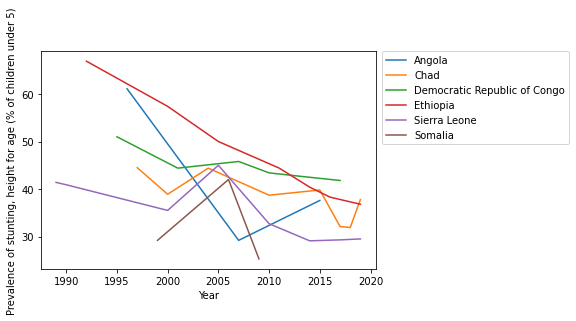

In [22]:
sns.lineplot(data=df_stunting_7, x="Year", y="Prevalence of stunting, height for age (% of children under 5)", hue="Entity")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [23]:
#  Prevalence of wasting, weight for height (% of children under 5) of 'Angola','Sierra Leone','Ethiopia','Chad',"Democratic Republic of Congo" and 'Somalia'
df_lowweight_7=df_lowweight[(df_lowweight['Entity']=='Angola')|(df_lowweight['Entity']=='Somalia')|(df_lowweight['Entity']=='Sierra Leone')|
               (df_lowweight['Entity']=='Ethiopia')|(df_lowweight['Entity']=='Chad')|
               (df_lowweight['Entity']=='Democratic Republic of Congo')]

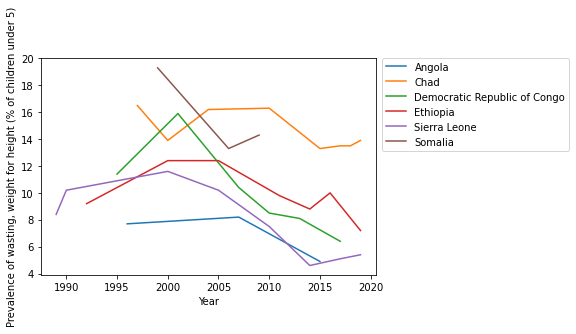

In [24]:
sns.lineplot(data=df_lowweight_7, x="Year", y="Prevalence of wasting, weight for height (% of children under 5)", hue="Entity")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);